In [186]:
import pandas as pd
import numpy as nm
pd.options.display.max_rows = 4000
 

In [50]:


fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

data = pd.read_excel(fd,sheet_name='Raw')

In [ ]:
data

In [ ]:
#data = data.rename(columns={'Unnamed: 0': 'month','Unnamed: 1':'year','Unnamed: 2':'unemprate','Unnamed: 3': 's&p500','Unnamed: 4':'pmi','Unnamed: 5':'pmi1'})
data = data.drop([23,24])
data

In [56]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = LinearRegression()
x = data[['Unemployment rate change','S&P500change']]
y = data['PMI1change']
model = sm.OLS(y.astype(float),x.astype(float)).fit()
predictions = model.predict(x)
model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PMI1change   R-squared (uncentered):                   0.202
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              2.406
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                       0.117
Time:                        01:48:56   Log-Likelihood:                         -48.935
No. Observations:                  21   AIC:                                      101.9
Df Residuals:                      19   BIC:                                      104.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Unemployment rate change     0.0883      0.172      0.512      0.614      -0.273       0.449
S&P500change                -0.2836      0.135     -2.096      0.050      -0.567      -0.000
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.978
Skew:                          -0.516   Prob(JB):                        0.613
Kurtosis:                       2.767   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import pingouin as pg
pg.corr(x=data['unemprate'].astype(float), y=data['pmi1'].astype(float))

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,21,0.079,"[-0.37, 0.49]",0.006,-0.104,0.735021,0.285,0.063


In [187]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\finaladspend.xlsx")

adspend = pd.read_excel(fd,sheet_name=0)

In [188]:
adspend.columns = adspend.iloc[2,:]
adspend = adspend.drop([0,1,2,26,27,28,29,30,31])
adspend = adspend.T
adspend.columns = adspend.iloc[0,:]
adspend['date'] = adspend.index
#adspend = adspend.rename(columns={'data':'date'})
s = pd.Series (range(0,124))
adspend = adspend.set_index(s)
adspend = adspend.drop([0,1,123])
adspend = adspend.fillna(0)

In [192]:
columns = adspend.columns

In [193]:
adspendchange = pd.DataFrame()

for columns in adspend.columns:
    if columns != 'date':
        adspendchange[columns] =adspend[columns].pct_change()
        adspendchange = adspendchange.fillna(0)
    elif columns == 'date':
        adspendchange['date'] = adspend['date']
        
s = pd.Series(range(0,121))
adspendchange = adspendchange.set_index(s)  

In [194]:
adspendchange['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()

In [195]:
adspendchange = adspendchange.set_index('mmyy')

In [199]:
adspend.columns

Index(['Network TV', 'Spot TV', 'SLN TV', 'Cable TV', 'Syndication',
       'Magazines', 'Sunday Mags', 'Local Mags', 'Hispanic Mags', 'B-to-B',
       'Natl Newsp', 'Newspapers', 'Hispanic Newsp', 'Network Radio',
       'Natl Spot Radio', 'Cinema', 'Int Display',
       'Mobile Web (from Apr 2015)', 'Mobile App', 'Online Video',
       'Int Search', 'Outdoor', 'GRAND TOTAL', 'date'],
      dtype='object', name='MEDIA')

In [235]:
adspend['Network TV'].ndim

adspend['Network TV'].shape

(121,)

In [311]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
#scaller = StandardScaler()
scaler = MinMaxScaler ()
adspendscale = adspend


columns = adspend.columns
columns = columns.drop('date')
test = []
adspendscale[columns] = scaler.fit_transform(adspend[columns])
adspendscale['date']  = pd.date_range('2010-1-1','2020-1-30', freq='MS').strftime("%Y-%b").tolist()
adspendscale = adspendscale.set_index('date')        



Text(0, 0.5, 'GRAND TOTAL')

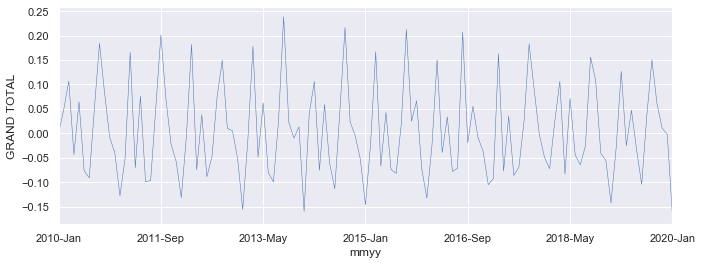

In [308]:
sns.set(rc={'figure.figsize':(11, 4)})
adspendchange['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')

Text(0, 0.5, 'GRAND TOTAL')

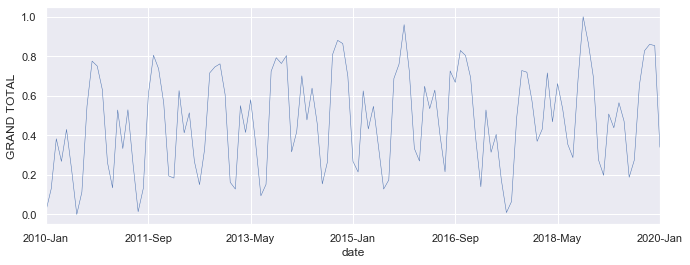

In [312]:
sns.set(rc={'figure.figsize':(11, 4)})
adspendscale['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')

In [361]:
for i in range (0,adspendscale.shape[0]-2):
    adspendscale.loc[adspendscale.index[i+2],'SMA_3'] = np.round(((adspendscale.iloc[i,22]+adspendscale.iloc[i+1,22]+adspendscale.iloc[i+2,22])/3),1)
    

In [365]:
adspendscale['pandas_SMA_3'] = adspendscale.iloc[:,22].rolling(window=3).mean()
adspendscale.iloc[1,24] = adspendscale.iloc[1,22]

In [384]:
adspendscale['pandas_EMA'] = adspendscale.iloc[:,22].ewm(span=40,adjust=False).mean()

Text(0, 0.5, 'pandas_EMA')

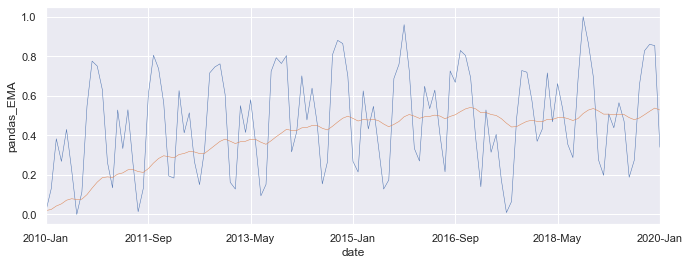

In [387]:
sns.set(rc={'figure.figsize':(11, 4)})
adspendscale['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')
adspendscale['pandas_EMA'].plot(linewidth=.5).set_ylabel('pandas_EMA')

In [316]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

unemp = pd.read_excel(fd,sheet_name=1)

In [317]:
unemp = unemp.drop(['Unnamed: 3',
       'https://data.bls.gov/timeseries/LNS14000000', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],axis=1)

In [318]:
unempchange = pd.DataFrame()
unempchange['ratechange'] = unemp['value'].pct_change()
unempchange = unempchange.fillna(0)
unempchange['date']  = pd.date_range('2010-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
unempchange = unempchange.set_index('date')

In [319]:
unemp.columns

Index(['Month', 'year', 'value'], dtype='object')

In [320]:
scaler = MinMaxScaler ()
unempscale = unemp
columns = unemp.columns
columns = columns.drop(['Month','year'])
unempscale[columns] = scaler.fit_transform(unempscale[columns])
unempscale['date']  = pd.date_range('2010-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
unempscale = unempscale.set_index('date')
        


Text(0, 0.5, 'ratechange')

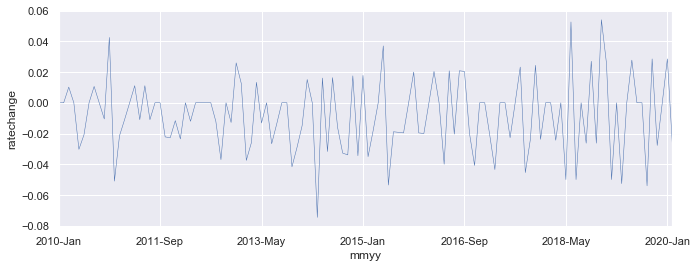

In [120]:
sns.set(rc={'figure.figsize':(11, 4)})
unempchange['ratechange'].plot(linewidth=.5).set_ylabel('ratechange')

Text(0, 0.5, 'value')

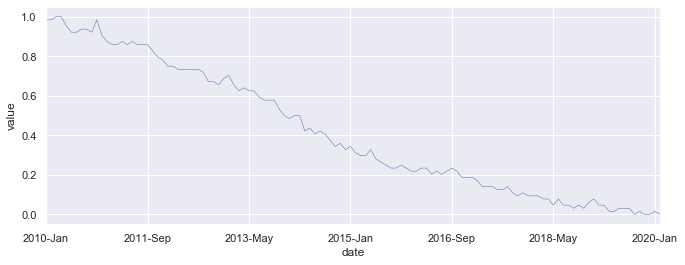

In [321]:
sns.set(rc={'figure.figsize':(11, 4)})
unempscale['value'].plot(linewidth=.5).set_ylabel('value')

In [275]:
import pingouin as pg
pg.corr(x=unempscale['value'].iloc[0:121], y=adspendscale['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.226,"[-0.39, -0.05]",0.051,0.035,0.012608,2.459,0.709


In [276]:
import pingouin as pg
pg.corr(x=unempchange['ratechange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.097,"[-0.27, 0.08]",0.01,-0.007,0.287499,0.199,0.187


In [379]:
 pg.corr(x=unempscale['value'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.324,"[-0.48, -0.15]",0.105,0.09,0.000283,76.464,0.956


In [388]:
 pg.corr(x=unempscale['value'].iloc[0:121], y=adspendscale['pandas_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.918,"[-0.94, -0.88]",0.843,0.84,1.154486e-49,1.267e+46,1.0


In [277]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

snp = pd.read_excel(fd,sheet_name=0)

In [278]:
snp = snp.drop(['Unnamed: 4',
       'https://finance.yahoo.com/quote/%5EGSPC/history/'],axis=1)

In [280]:
snpchange = pd.DataFrame()
snpchange['indexchange'] = snp['Close'].pct_change()
snpchange = snpchange.fillna(0)
snpchange['date'] = snp['Date']
snpchange = snpchange.set_index('date')


In [281]:
snp.columns

Index(['Date', 'Month', 'year', 'Close'], dtype='object')

In [282]:
scaler = MinMaxScaler ()
snpscale = snp
columns = snp.columns
columns = columns.drop(['Date','Month','year'])
snpscale[columns] = scaler.fit_transform(snpscale[columns])
snpscale['date'] = snp['Date']
snpscale = snpscale.set_index('date')

Text(0, 0.5, 'indexratechange')

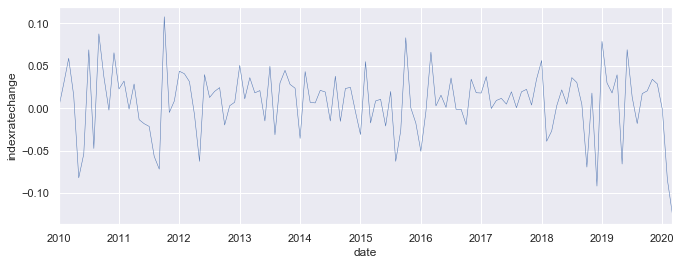

In [140]:
sns.set(rc={'figure.figsize':(11, 4)})
snpchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'SNPIndexClose')

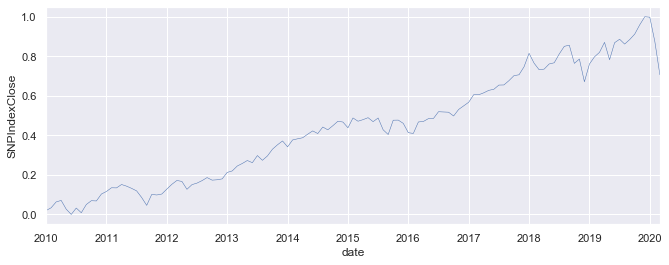

In [286]:
sns.set(rc={'figure.figsize':(11, 4)})
snpscale['Close'].plot(linewidth=.5).set_ylabel('SNPIndexClose')

In [142]:
import pingouin as pg
pg.corr(x=snpchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.045,"[-0.22, 0.13]",0.002,-0.015,0.626385,0.128,0.078


In [287]:
import pingouin as pg
pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.206,"[0.03, 0.37]",0.043,0.026,0.023244,1.447,0.626


In [380]:
import pingouin as pg
pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.299,"[0.13, 0.45]",0.09,0.074,0.000848,27.789,0.92


In [389]:
pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['pandas_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.828,"[0.76, 0.88]",0.685,0.68,1.215464e-31,2.655e+28,1.0


In [288]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\phsi.xlsx")

phsi = pd.read_excel(fd,sheet_name=1)

In [289]:
phsi.columns

Index(['Date', 'Index', 'Month', 'Year', 'Item', 'Unnamed: 5'], dtype='object')

In [290]:
phsi = phsi.drop(['Item', 'Unnamed: 5'],axis=1)
phsi = phsi.drop([116,117])

In [292]:
phsichange = pd.DataFrame()
phsichange['indexchange'] = phsi['Index'].pct_change()
phsichange = phsichange.fillna(0)
phsichange['date'] = phsi['Date']
phsichange = phsichange.set_index('date')


In [293]:
scaler = MinMaxScaler ()
phsiscale = phsi
columns = phsiscale.columns
columns = columns.drop(['Date','Month','Year'])
phsiscale[columns] = scaler.fit_transform(phsiscale[columns])
phsiscale['date'] = phsi['Date']
phsiscale = phsiscale.set_index('date')

Text(0, 0.5, 'indexratechange')

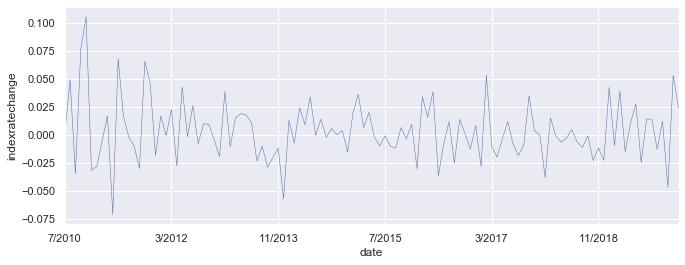

In [173]:
sns.set(rc={'figure.figsize':(11, 4)})
phsichange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'PhsiIndex')

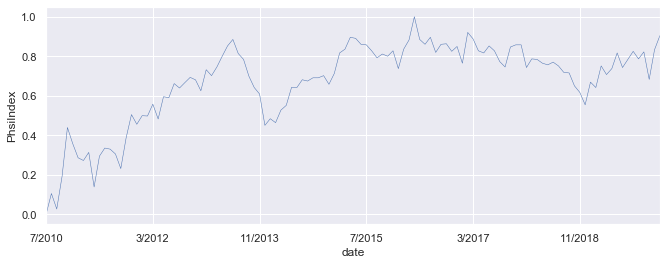

In [294]:
sns.set(rc={'figure.figsize':(11, 4)})
phsiscale['Index'].plot(linewidth=.5).set_ylabel('PhsiIndex')

In [174]:
pg.corr(x=phsichange['indexchange'].iloc[0:115], y=adspendchange['GRAND TOTAL'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,-0.002,"[-0.18, 0.18]",0.0,-0.018,0.983731,0.117,0.05


In [295]:
pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['GRAND TOTAL'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.108,"[-0.08, 0.29]",0.012,-0.006,0.252469,0.223,0.209


In [381]:
pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['pandas_SMA_3'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.163,"[-0.02, 0.34]",0.027,0.009,0.081164,0.523,0.417


In [390]:

pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['pandas_EMA'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.849,"[0.79, 0.89]",0.72,0.715,4.862277e-33,6.071e+29,1.0


In [296]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\manufaturing index.xlsx")

manu = pd.read_excel(fd,sheet_name=0)

In [ ]:
manu = manu.drop(['Item'],axis=1)
manu = manu.drop(123)

In [300]:
manuchange = pd.DataFrame()
manuchange['indexchange'] = manu['Index'].pct_change()
manuchange = manuchange.set_index(manu['Date'])
manuchange = manuchange.fillna(0)


In [302]:
manu.columns

Index(['Date', 'Index', 'Month', 'Year'], dtype='object')

In [304]:
scaler = MinMaxScaler ()
manuscale = manu
columns = manuscale.columns
columns = columns.drop(['Date','Month','Year'])
manuscale[columns] = scaler.fit_transform(manuscale[columns])
manuscale['date'] = manu['Date']
manuscale = manuscale.set_index(manu['Date'])

Text(0, 0.5, 'indexratechange')

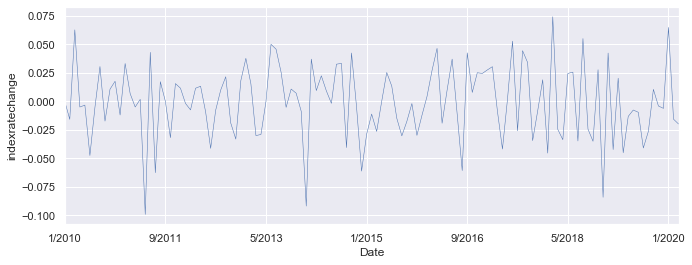

In [183]:
sns.set(rc={'figure.figsize':(11, 4)})
manuchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'ManuIndex')

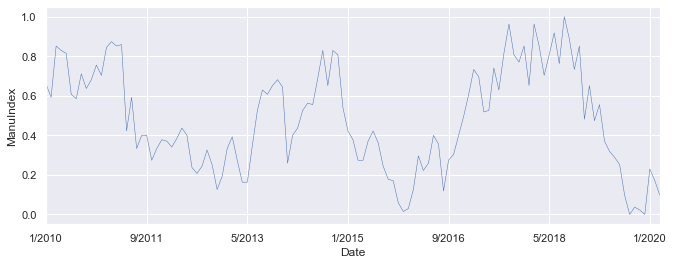

In [305]:
sns.set(rc={'figure.figsize':(11, 4)})
manuscale['Index'].plot(linewidth=.5).set_ylabel('ManuIndex')

In [185]:
import pingouin as pg
pg.corr(x=manuchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.097,"[-0.27, 0.08]",0.009,-0.007,0.291557,0.197,0.184


In [306]:

pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['GRAND TOTAL'])


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.11,"[-0.28, 0.07]",0.012,-0.005,0.227802,0.233,0.227


In [382]:

pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.169,"[-0.34, 0.01]",0.028,0.012,0.064181,0.618,0.459


In [ ]:
 pd.

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = LinearRegression()
x = data[['Unemployment rate change','S&P500change']]
y = data['PMI1change']
model = sm.OLS(y.astype(float),x.astype(float)).fit()
predictions = model.predict(x)
model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)
